<a href="https://colab.research.google.com/github/Je73hwg/1BM22CS046_MLLAB/blob/main/1BM22CS046_EndToEnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

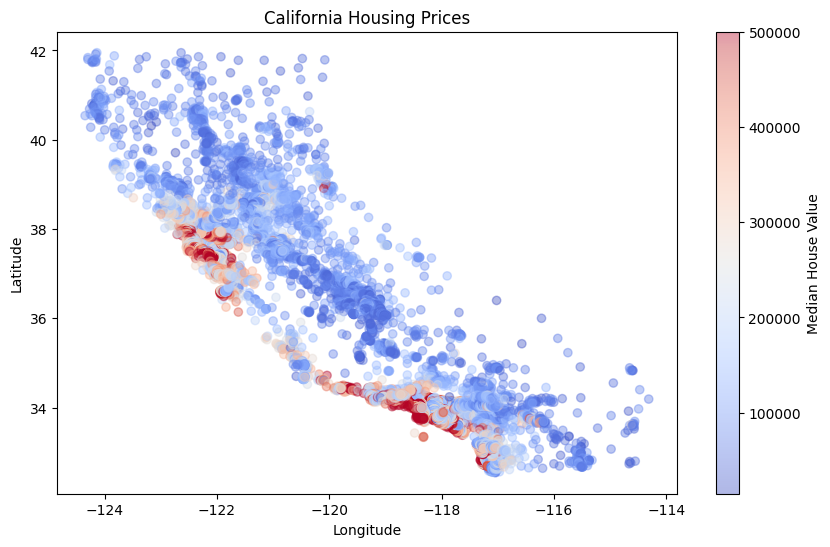

Linear Regression MSE: 5062019613.457126
Fine-tuned Random Forest MSE: 2480267707.7884703
Best Parameters: {'max_depth': 20, 'n_estimators': 200}


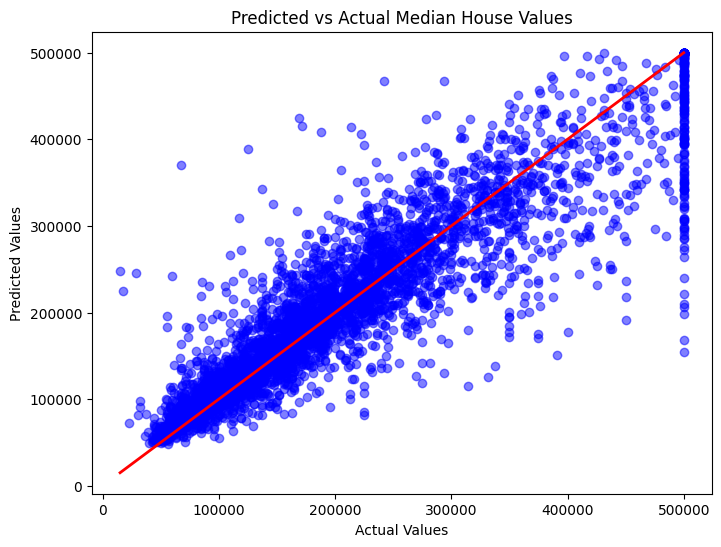

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Frame the problem
# Predict median house value based on district features

# Get the data
data_url = "https://github.com/ageron/data/raw/main/housing.tgz"
df = pd.read_csv("housing.csv")

# Discover and visualize the data
df.info()
print(df.describe())
print(df.head())

# Visualizing housing locations
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, c=df['median_house_value'], cmap='coolwarm')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Prepare the data for Machine Learning
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a baseline model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')

# Fine-tune the model with Random Forest and Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the fine-tuned model
y_pred_tuned = grid_search.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f'Fine-tuned Random Forest MSE: {mse_tuned}')
print(f'Best Parameters: {grid_search.best_params_}')

# Presenting results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Median House Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()
